In [45]:
#### FIRST IMPORTS ####
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
#### SKLEARN ####
#!pip install -U scikit-learn
import sklearn 
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
#### READING DATASET ####
terr_df = pd.read_csv("globalterrorismdb_shorter.csv", encoding='latin-1')
#### RESOLVING ERROR ####
# encoding = 'latin-1' is useful to fix the issue we get when we import the dataset
# The error was : "'utf-8' codec can't decode byte 0xe1 in position 5: invalid continuation byte"
#### CONCERNED DATASET #### 
# https://www.kaggle.com/northon/globalterrorismdatabase-compact

In [14]:
terr_df.dtypes

eventid               int64
iyear                 int64
imonth                int64
iday                  int64
extended              int64
country               int64
country_txt          object
region                int64
region_txt           object
provstate            object
city                 object
latitude            float64
longitude           float64
specificity         float64
vicinity              int64
location             object
summary              object
crit1                 int64
crit2                 int64
crit3                 int64
doubtterr             int64
alternative         float64
alternative_txt      object
multiple              int64
success               int64
suicide               int64
attacktype1           int64
attacktype1_txt      object
targtype1             int64
targtype1_txt        object
targsubtype1        float64
targsubtype1_txt     object
corp1                object
target1              object
natlty1             float64
natlty1_txt         

In [16]:
terr_df.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,nkill,nkillter,nwound,nwoundte,property,propextent,propextent_txt,ishostkid,nhostkid,dbsource
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,1.0,NaN,0.0,NaN,0,NaN,NaN,0.0,NaN,PGIS
1,197000000002,1970,0,0,0,130,Mexico,1,North America,NaN,...,0.0,NaN,0.0,NaN,0,NaN,NaN,1.0,1.0,PGIS
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,1.0,NaN,0.0,NaN,0,NaN,NaN,0.0,NaN,PGIS
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,NaN,NaN,NaN,NaN,1,NaN,NaN,0.0,NaN,PGIS
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,0.0,NaN,PGIS


In [76]:
terr_df.tail(5)

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,nkill,nkillter,nwound,nwoundte,property,propextent,propextent_txt,ishostkid,nhostkid,dbsource
170345,201612310040,2016,12,31,0,146,Niger,11,Sub-Saharan Africa,Diffa,...,15.0,12.0,7.0,0.0,0,NaN,NaN,0.0,NaN,START Primary Collection
170346,201612310042,2016,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,...,0.0,0.0,0.0,0.0,-9,NaN,NaN,0.0,NaN,START Primary Collection
170347,201612310043,2016,12,31,1,229,Democratic Republic of the Congo,11,Sub-Saharan Africa,Bas-Uele,...,0.0,0.0,NaN,0.0,0,NaN,NaN,1.0,33.0,START Primary Collection
170348,201612310044,2016,12,31,0,130,Mexico,1,North America,Chihuahua,...,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),0.0,NaN,START Primary Collection
170349,201701270001,2016,12,30,0,195,Sudan,11,Sub-Saharan Africa,Central Darfur,...,0.0,0.0,0.0,0.0,0,NaN,NaN,0.0,NaN,START Primary Collection


In [79]:
terr_df.shape

(170350, 58)

In [32]:
#### FIRST DELETING USELESS COLUMNS ####
# We're deleting the columns we won't/can't use in a data analysis
first_clean_terr = terr_df.drop(columns = ['extended', 'provstate', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'multiple'])
first_clean_terr.head(20)

,eventid,iyear,imonth,iday,country,country_txt,region,region_txt,city,alternative_txt,...,nkill,nkillter,nwound,nwoundte,property,propextent,propextent_txt,ishostkid,nhostkid,dbsource
0,197000000001,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,Santo Domingo,NaN,...,1.0,NaN,0.0,NaN,0,NaN,NaN,0.0,NaN,PGIS
1,197000000002,1970,0,0,130,Mexico,1,North America,Mexico city,NaN,...,0.0,NaN,0.0,NaN,0,NaN,NaN,1.0,1.0,PGIS
2,197001000001,1970,1,0,160,Philippines,5,Southeast Asia,Unknown,NaN,...,1.0,NaN,0.0,NaN,0,NaN,NaN,0.0,NaN,PGIS
3,197001000002,1970,1,0,78,Greece,8,Western Europe,Athens,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,0.0,NaN,PGIS
4,197001000003,1970,1,0,101,Japan,4,East Asia,Fukouka,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,0.0,NaN,PGIS
5,197001010002,1970,1,1,217,United States,1,North America,Cairo,NaN,...,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),0.0,NaN,Hewitt Project
6,197001020001,1970,1,2,218,Uruguay,3,South America,Montevideo,NaN,...,0.0,NaN,0.0,NaN,0,NaN,NaN,0.0,NaN,PGIS
7,197001020002,1970,1,2,217,United States,1,North America,Oakland,Other Crime Type,...,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),0.0,NaN,Hewitt Project
8,197001020003,1970,1,2,217,United States,1,North America,Madison,NaN,...,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),0.0,NaN,Hewitt Project
9,197001030001,1970,1,3,217,United States,1,North America,Madison,NaN,...,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),0.0,NaN,Hewitt Project


In [69]:
#### SECOND DELETING USELESS COLUMNS ####
# We're deleting the columns we won't/can't use in a data 
clean_terr = first_clean_terr.drop(columns = ['guncertain1', 'individual', 'nperpcap', 'claimed', 'weapsubtype1', 'weapsubtype1_txt', 'nkill', 'nkillter', 'nwound', 'nwoundte', 'property', 'propextent', 'propextent_txt', 'ishostkid', 'nhostkid', ])
clean_terr.head(20)

,eventid,iyear,imonth,iday,country,country_txt,region,region_txt,city,alternative_txt,...,target1,natlty1,natlty1_txt,gname,motive,nperps,compclaim,weaptype1,weaptype1_txt,dbsource
0,197000000001,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,Santo Domingo,NaN,...,Julio Guzman,58.0,Dominican Republic,MANO-D,NaN,NaN,NaN,13,Unknown,PGIS
1,197000000002,1970,0,0,130,Mexico,1,North America,Mexico city,NaN,...,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,NaN,7.0,NaN,13,Unknown,PGIS
2,197001000001,1970,1,0,160,Philippines,5,Southeast Asia,Unknown,NaN,...,Employee,217.0,United States,Unknown,NaN,NaN,NaN,13,Unknown,PGIS
3,197001000002,1970,1,0,78,Greece,8,Western Europe,Athens,NaN,...,U.S. Embassy,217.0,United States,Unknown,NaN,NaN,NaN,6,Explosives/Bombs/Dynamite,PGIS
4,197001000003,1970,1,0,101,Japan,4,East Asia,Fukouka,NaN,...,U.S. Consulate,217.0,United States,Unknown,NaN,NaN,NaN,8,Incendiary,PGIS
5,197001010002,1970,1,1,217,United States,1,North America,Cairo,NaN,...,Cairo Police Headquarters,217.0,United States,Black Nationalists,To protest the Cairo Illinois Police Deparment,-99.0,NaN,5,Firearms,Hewitt Project
6,197001020001,1970,1,2,218,Uruguay,3,South America,Montevideo,NaN,...,Juan Maria de Lucah/Chief of Directorate of in...,218.0,Uruguay,Tupamaros (Uruguay),NaN,3.0,NaN,5,Firearms,PGIS
7,197001020002,1970,1,2,217,United States,1,North America,Oakland,Other Crime Type,...,Edes Substation,217.0,United States,Unknown,NaN,-99.0,NaN,6,Explosives/Bombs/Dynamite,Hewitt Project
8,197001020003,1970,1,2,217,United States,1,North America,Madison,NaN,...,"R.O.T.C. offices at University of Wisconsin, M...",217.0,United States,New Year's Gang,To protest the War in Vietnam and the draft,1.0,NaN,8,Incendiary,Hewitt Project
9,197001030001,1970,1,3,217,United States,1,North America,Madison,NaN,...,Selective Service Headquarters in Madison Wisc...,217.0,United States,New Year's Gang,To protest the War in Vietnam and the draft,1.0,NaN,8,Incendiary,Hewitt Project


In [41]:
#### IS THERE A LINK BETWEEN THE WEAPON TYPE AND THE COUNTRY 
#### OR A LINK BETWEEN THE YEAR AND THE COUNTRY ? ####

In [42]:
#### CHECKING DUPLICATE ####
clean_terr.duplicated(subset = ['eventid']).sum()

0

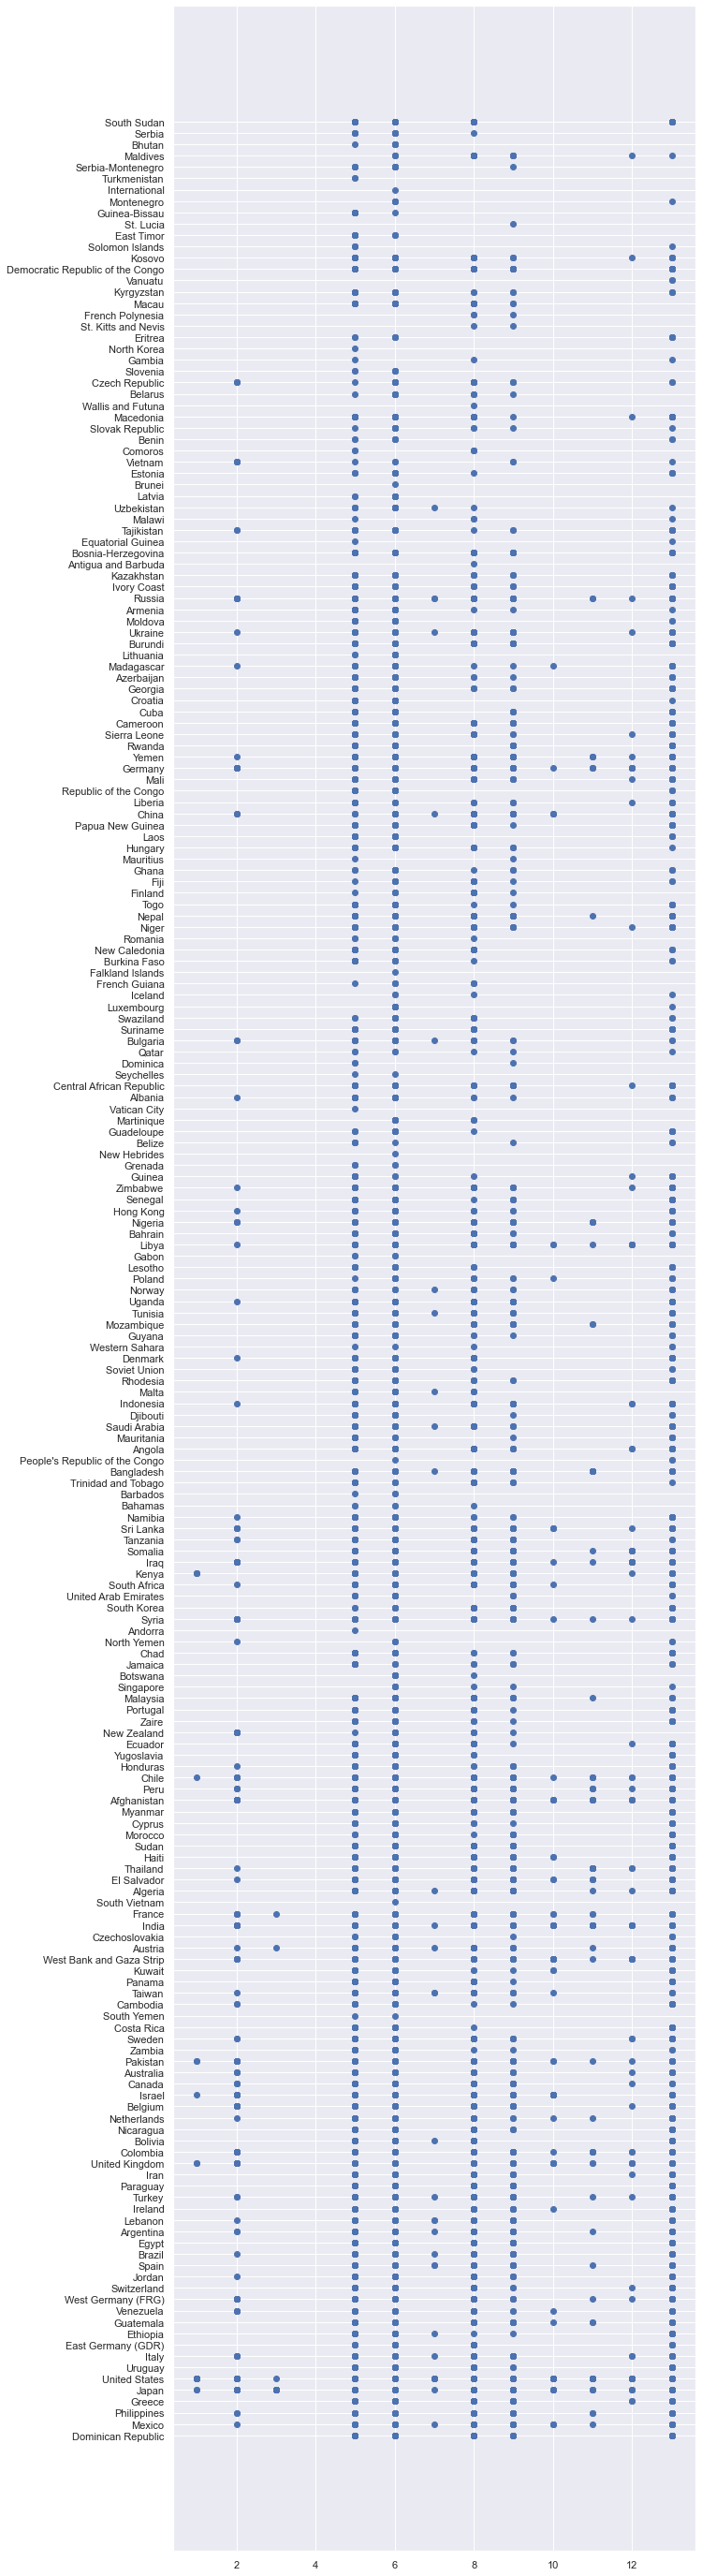

In [52]:
#### WEAPON TYPE AND COUNTRY ####
matplotlib.pyplot.figure(figsize=(10,50))
clean_terr_d = plt.matplotlib.pyplot.scatter(clean_terr['weaptype1'], clean_terr['country_txt'])

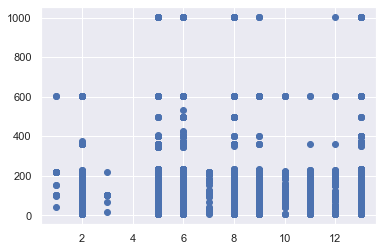

In [67]:
clean_terr_d = plt.matplotlib.pyplot.scatter(clean_terr['weaptype1'], clean_terr['country'])
# In this version, it doesn't mean a lot
# we just know that the most used weapons are 5, 6, 8, 9, 12 and 13

In [70]:
weapon = pd.DataFrame(clean_terr,columns=['weaptype1','weaptype1_txt'])
weapon

,weaptype1,weaptype1_txt
0,13,Unknown
1,13,Unknown
2,13,Unknown
3,6,Explosives/Bombs/Dynamite
4,8,Incendiary
...,...,...
170345,13,Unknown
170346,6,Explosives/Bombs/Dynamite
170347,13,Unknown
170348,5,Firearms


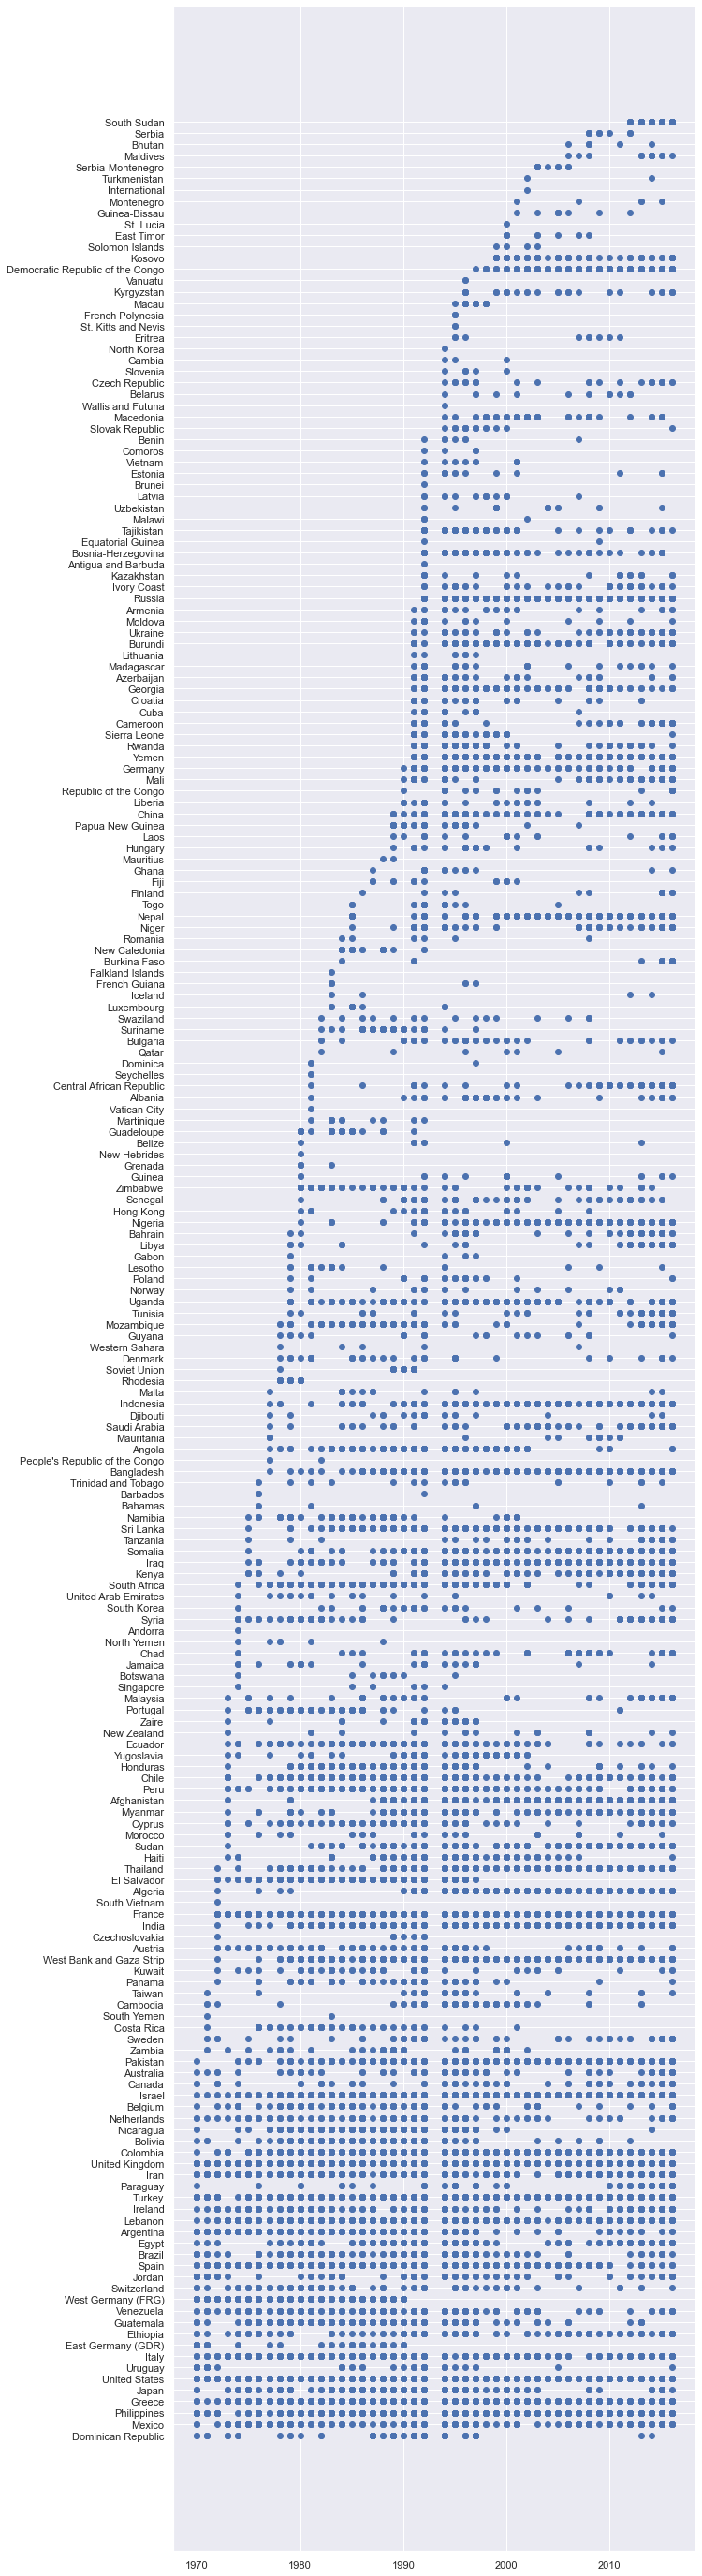

In [73]:
#### YEAR AND COUNTRY ####
matplotlib.pyplot.figure(figsize=(10,50))
clean_terr_d2 = plt.matplotlib.pyplot.scatter(clean_terr['iyear'], clean_terr['country_txt'])

In [74]:
# We can see the countries where there are terrorist attacks between 1970 and 2016 
# such as Dominican Republic, Mexico.. etc
# But we also see some countries where there aren't a lot of terrorist attacks:
# Only since a few years, like South Sudan, or Serbia.

In [80]:
#### BOXPLOTS ####

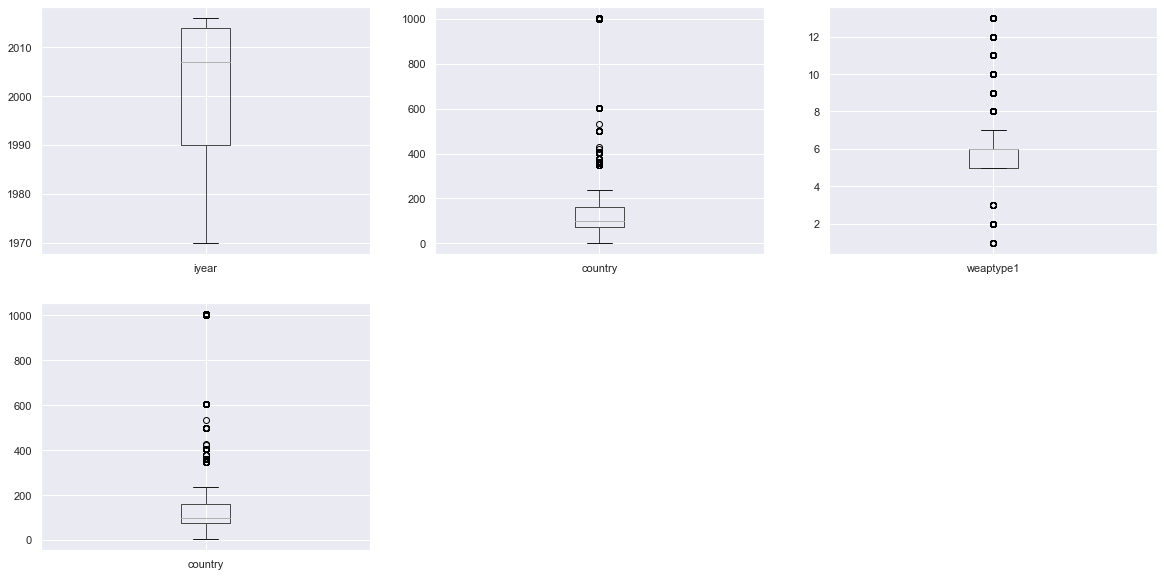

In [83]:
plt.figure(figsize=(20,10))
for i, col in enumerate(['iyear', 'country', 'weaptype1', 'country'], start=1):
    plt.subplot(2, 3, i)
    clean_terr.boxplot(col)